In [176]:
import numpy as np
import matplotlib.pyplot as plt

# Этот ноутбук используются только для более удобного получения графиков

In [121]:
names_land = ["Sort_Landscape", "Huang_Landscape", "Const_Landscape"]
names_cat = ["Sort_Cat_picture",  "Huang_Cat_picture", "Const_Cat_picture"]
opencv = ["opencv_Landscape", "opencv_Cat_picture"]

## Скорость

In [122]:
for name in opencv:
    arr = np.load("time_results/" + name + ".npy")
    print(name, np.min(arr), np.max(arr))

opencv_Landscape 2.9e-05 0.004593
opencv_Cat_picture 0.000191 0.078716


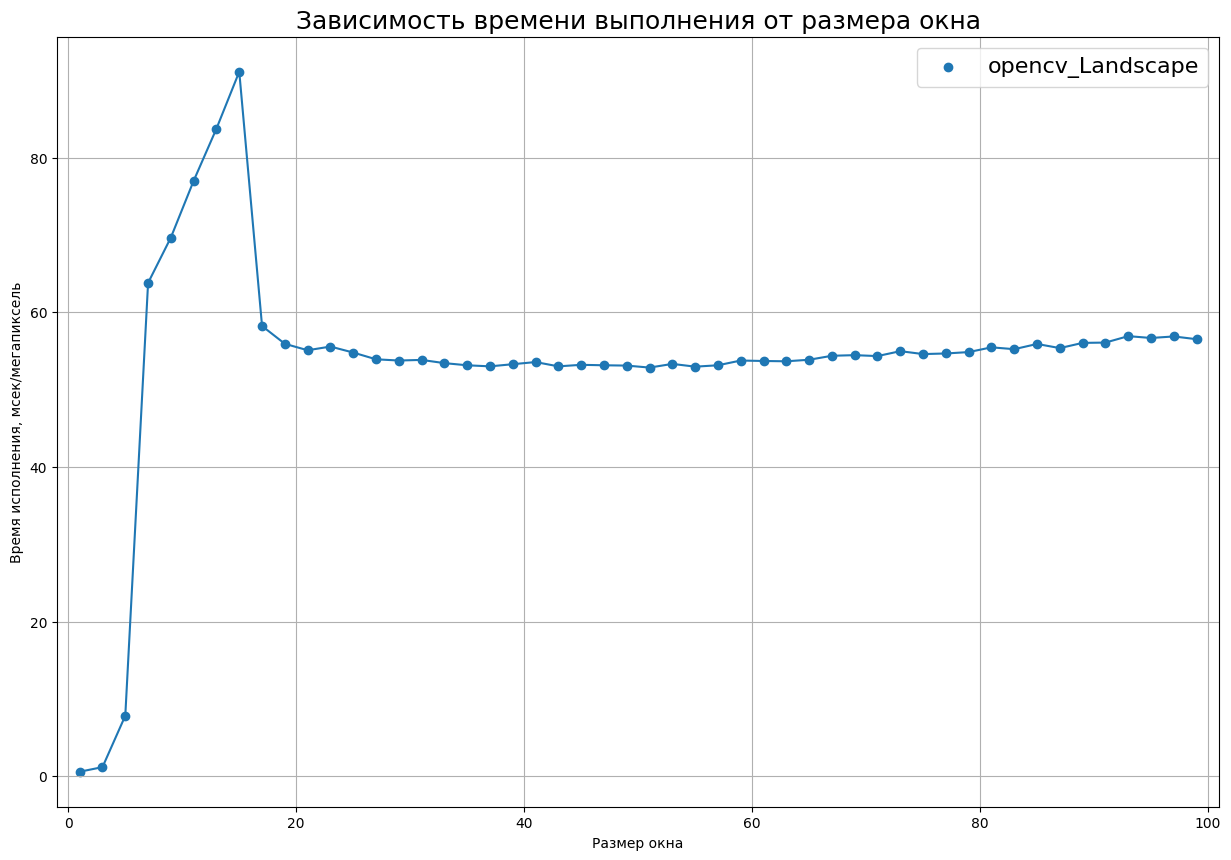

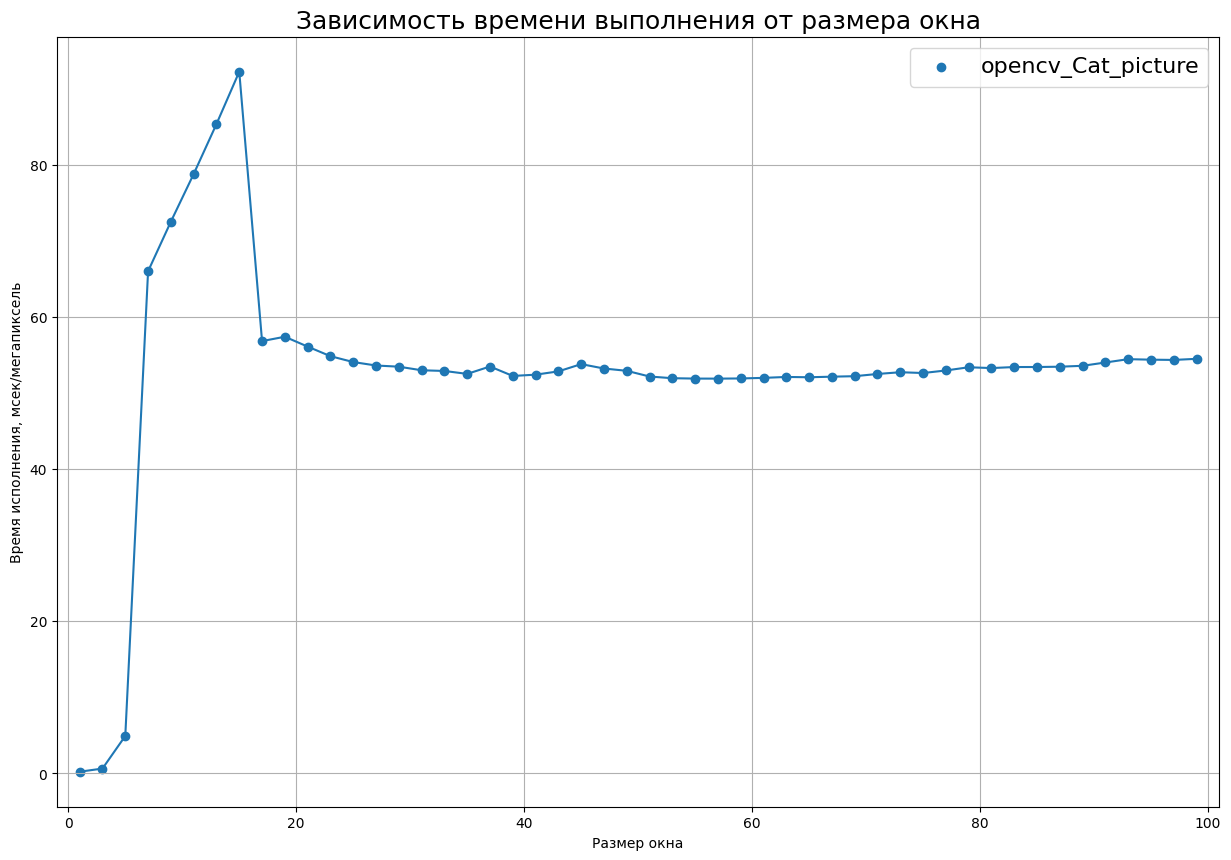

In [185]:
for name in opencv:
    plt.figure(figsize=(15, 10))
    arr = np.load("time_results/" + name + ".npy")
    x = 1 + 2 * (np.arange(len(arr)))
    plt.scatter(x, arr / (cat_size if "Cat" in name else land_size) * 10**3, label=name)
    plt.plot(x, arr / (cat_size if "Cat" in name else land_size) * 10**3)

    plt.title("Зависимость времени выполнения от размера окна", fontsize=18)
    plt.xlim([np.min(x) - 2, np.max(x) + 2])
    plt.xlabel("Размер окна")
    plt.ylabel("Время исполнения, мсек/мегапиксель")
    plt.grid(True)
    plt.legend(fontsize=16)
    plt.savefig('./plots/' + name + ".jpg")

In [146]:
for name in names_land:
    arr = np.load("time_results/" + name + ".npy")
    print(name, np.min(arr), np.max(arr))

Sort_Landscape 0.127096 102.173
Huang_Landscape 0.061134 0.24577
Const_Landscape 0.236478 0.34202


In [124]:
for name in names_cat:
    arr = np.load("time_results/" + name + ".npy")
    print(name, np.min(arr), np.max(arr))

Sort_Cat_picture 21.4803 772.894
Huang_Cat_picture 0.948004 2.73701
Const_Cat_picture 3.90966 4.68232


In [148]:
from PIL import Image

In [150]:
cat = np.array(Image.open("../pictures/originals/Cat_picture.jpeg"))
cat_size = cat.shape[0] * cat.shape[1] / 10**6
land = np.array(Image.open("../pictures/originals/landscape.jpeg"))
land_size = land.shape[0] * land.shape[1] / 10**6

## Графики

In [154]:
def MakePlot(names, plot_name, func_for_coords):
    plt.figure(figsize=(15, 10))
    for name in names:
        arr = np.load("time_results/" + name + ".npy")
        x = func_for_coords(np.arange(len(arr)))
        plt.scatter(x, arr / (cat_size if "Cat" in name else land_size) * 10**3, label=name)
        plt.plot(x, arr / (cat_size if "Cat" in name else land_size) * 10**3)

    plt.title("Зависимость времени выполнения от размера окна", fontsize=18)
    plt.xlim([np.min(x) - 2, np.max(x) + 2])
    plt.xlabel("Размер окна")
    plt.ylabel("Время исполнения, мсек/мегапиксель")
    plt.grid(True)
    plt.legend(fontsize=16)
    plt.savefig('./plots/' + plot_name + ".jpg")

In [155]:
def light_pic(x):
    return 3 + 8 * x

def heavy_pic(x):
    return 9 + 10 * x

## Основные графики

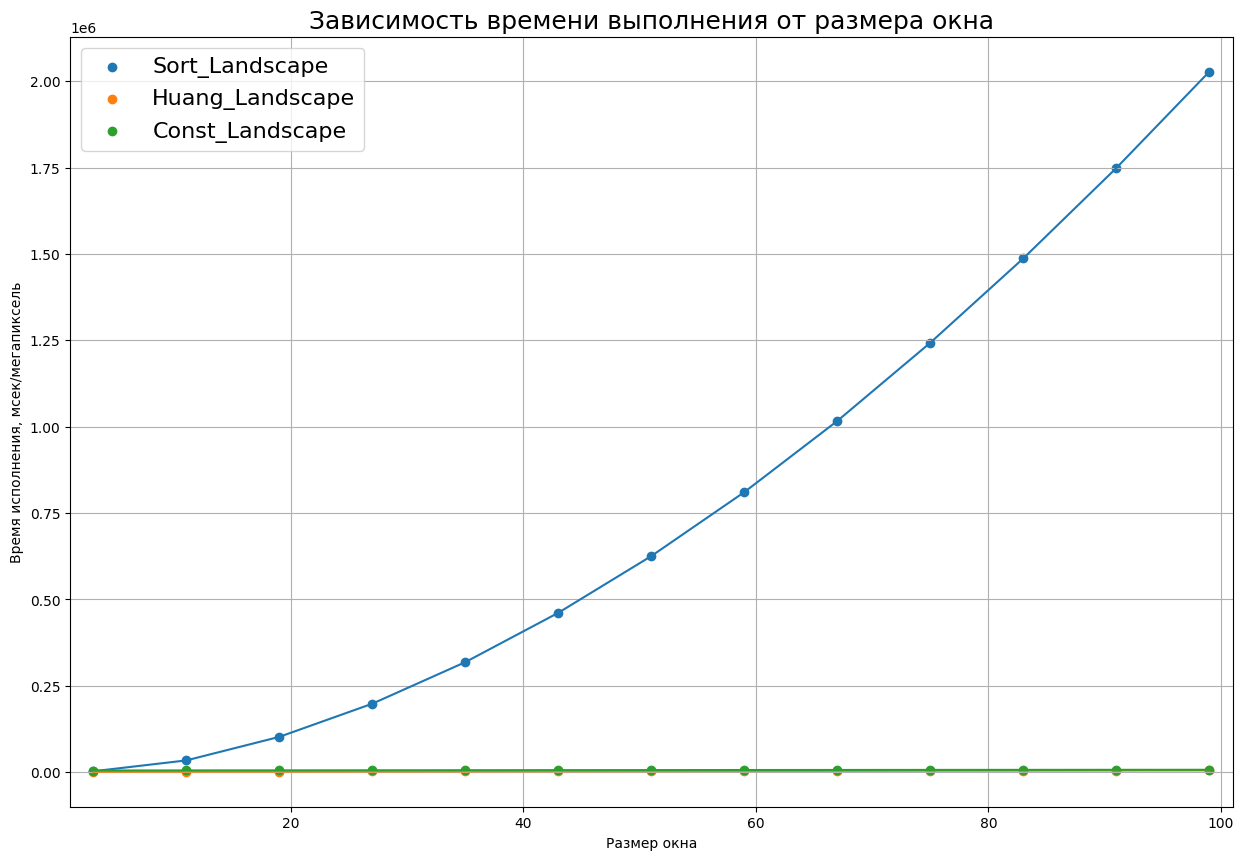

In [156]:
MakePlot(names_land, "landscape", light_pic)

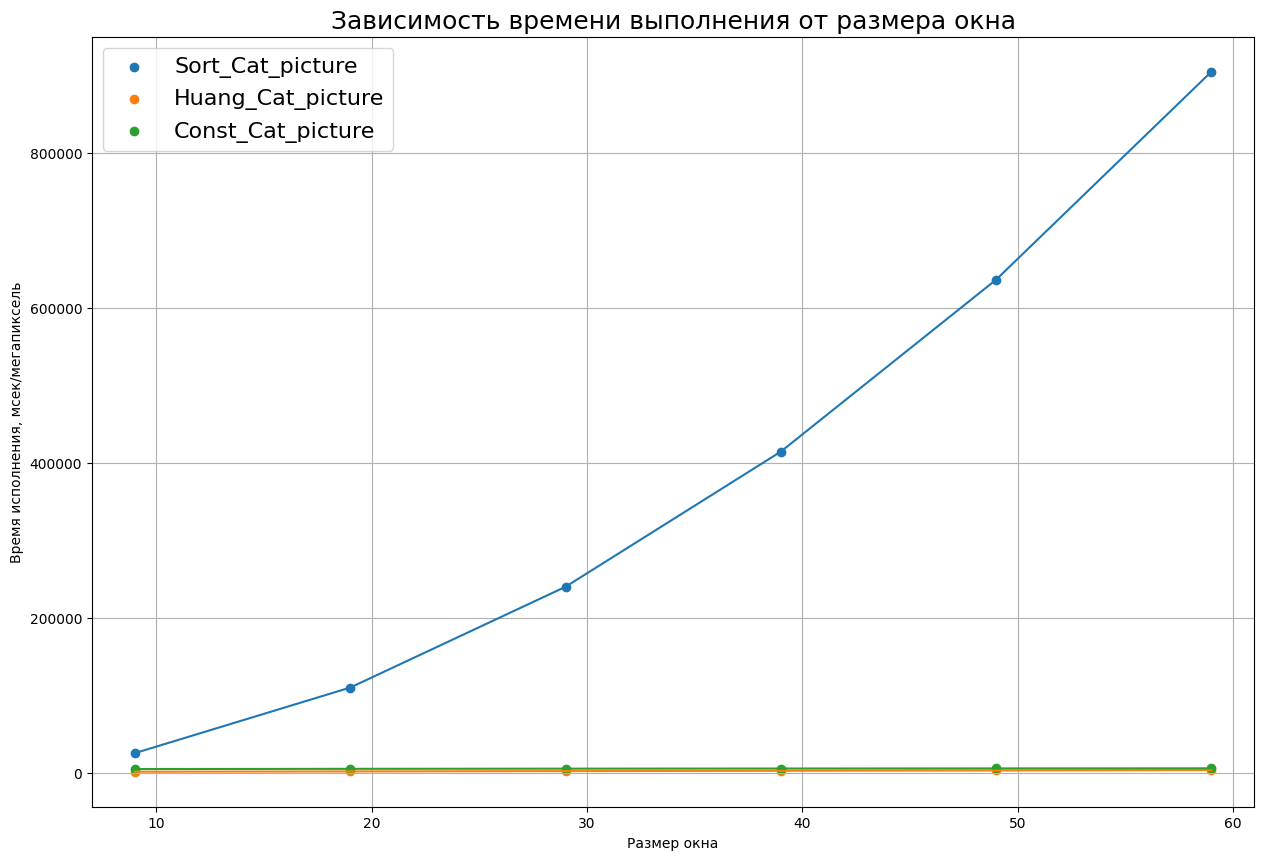

In [157]:
MakePlot(names_cat, "cat", heavy_pic)

## Графики без сортировки (для более подробного анализа)

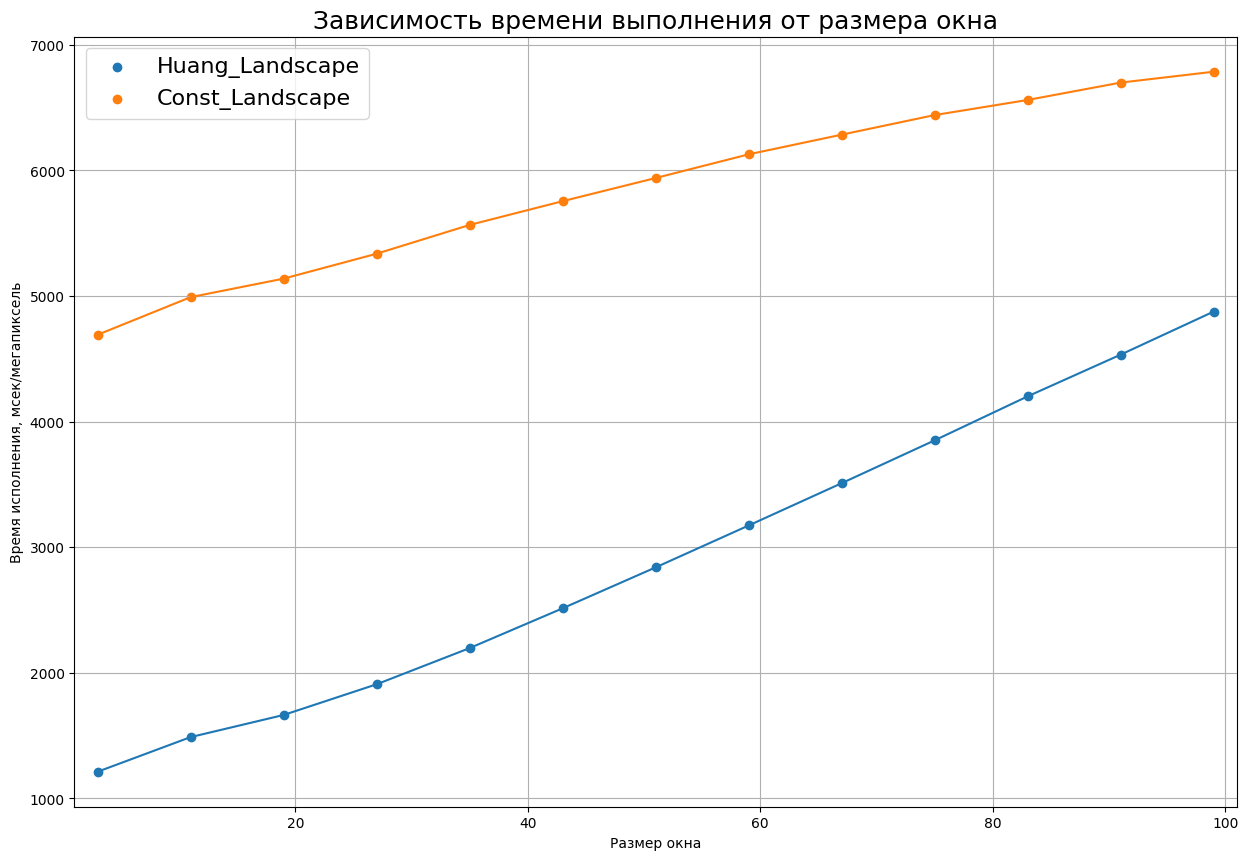

In [162]:
MakePlot(names_land[1:], "landscape_without_sort", light_pic)

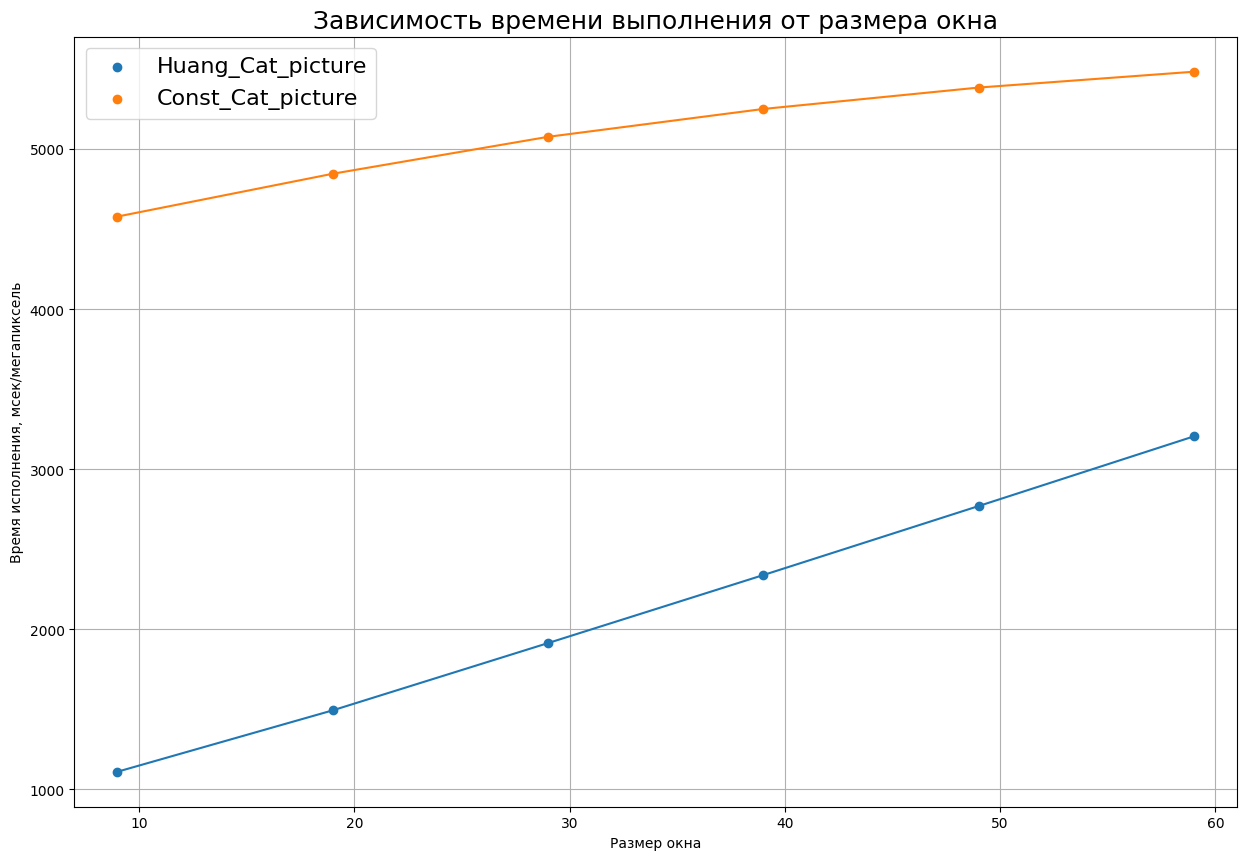

In [163]:
MakePlot(names_cat[1:], "cat_without_sort", heavy_pic)

## Приближение предполагаемыми функциями

In [164]:
from scipy.optimize import curve_fit

In [165]:
def MakeApprox(name, plot_name, func_for_coords, func_for_y, title):
    plt.figure(figsize=(15, 10))

    arr = np.load("time_results/" + name + ".npy")
    arr = arr / (cat_size if "Cat" in name else land_size) * 10**3
    x = func_for_coords(np.arange(len(arr)))
    popt, pcov = curve_fit(func_for_y, x, arr, maxfev=10**6)
    plt.scatter(x, arr, label=name)
    plt.plot(x, func_for_y(x, *popt), color='green')

    plt.title(title, fontsize=18)
    plt.xlim([np.min(x) - 2, np.max(x) + 2])
    plt.xlabel("Размер окна")
    plt.ylabel("Время исполнения, с")
    plt.grid(True)
    plt.legend(fontsize=16)
    plt.savefig('./plots/' + plot_name + ".jpg")

In [166]:
def func1(x, A, B, C, D, E, H):
    return A*x*x*np.log(x) + B*x*np.log(x) + C * np.log(x) + D * x * x + E * x + H

def func2(x, A, B, C, D, H):
    return A*x*x*np.log(x) + B*x*np.log(x) + C * np.log(x) + D * x * x + H

def func3(x, A, B, C, H):
    return A*x*x*np.log(x) + B*x*np.log(x) + C * np.log(x) + H

def func4(x, A, B, H):
    return A*x*x*np.log(x) + B*x*np.log(x) + H

def func5(x, A, H):
    return A*x*x*np.log(x) + H


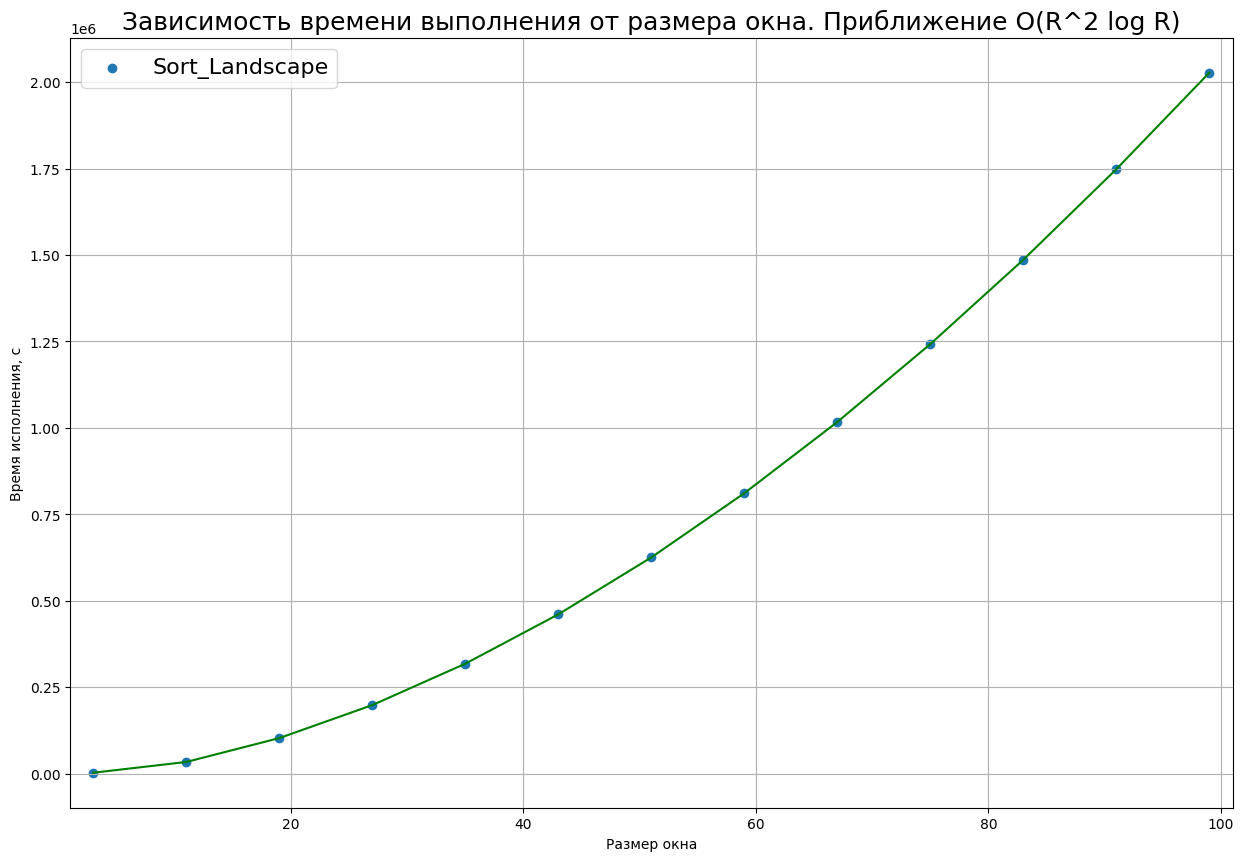

In [167]:
MakeApprox(names_land[0], "Sort_land_approx_1", light_pic, func1, "Зависимость времени выполнения от размера окна. Приближение O(R^2 log R)")

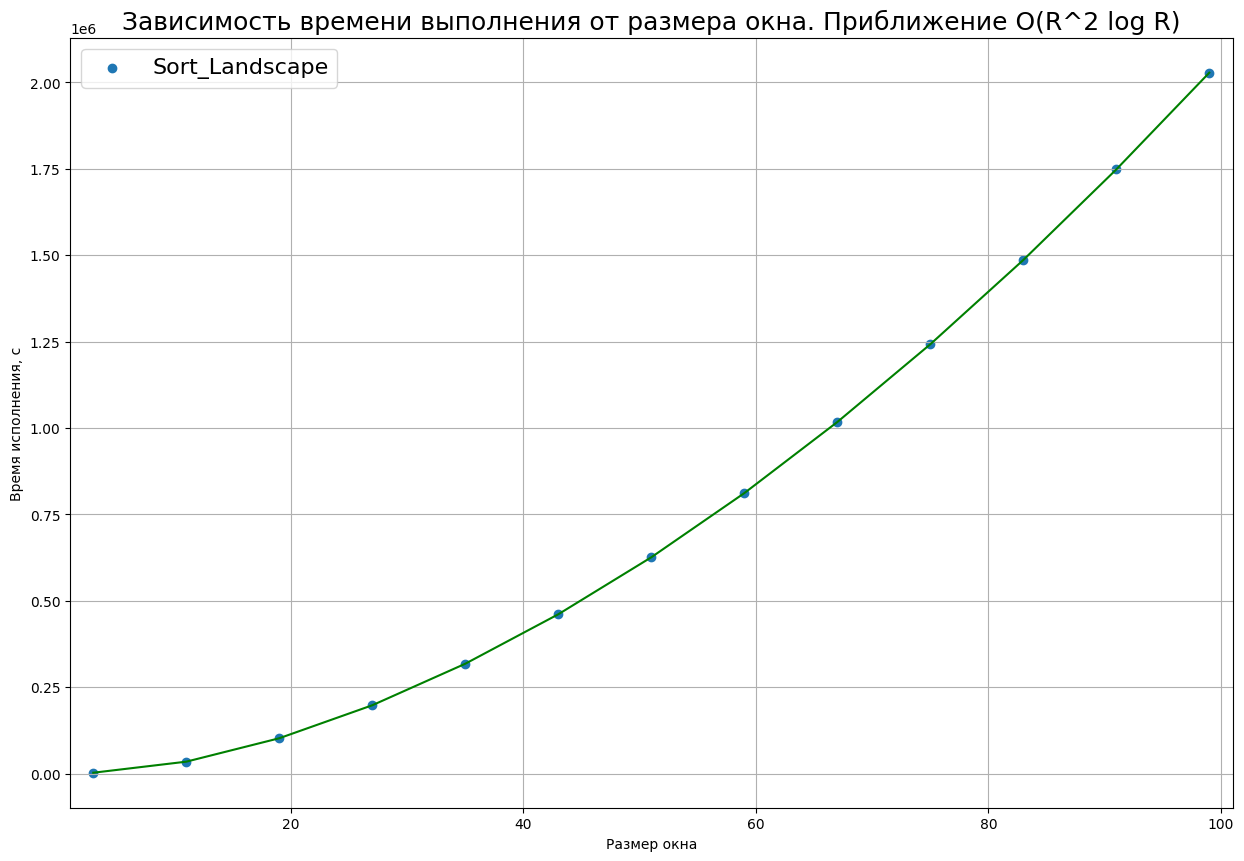

In [168]:
MakeApprox(names_land[0], "Sort_land_approx_2", light_pic, func2, "Зависимость времени выполнения от размера окна. Приближение O(R^2 log R)")

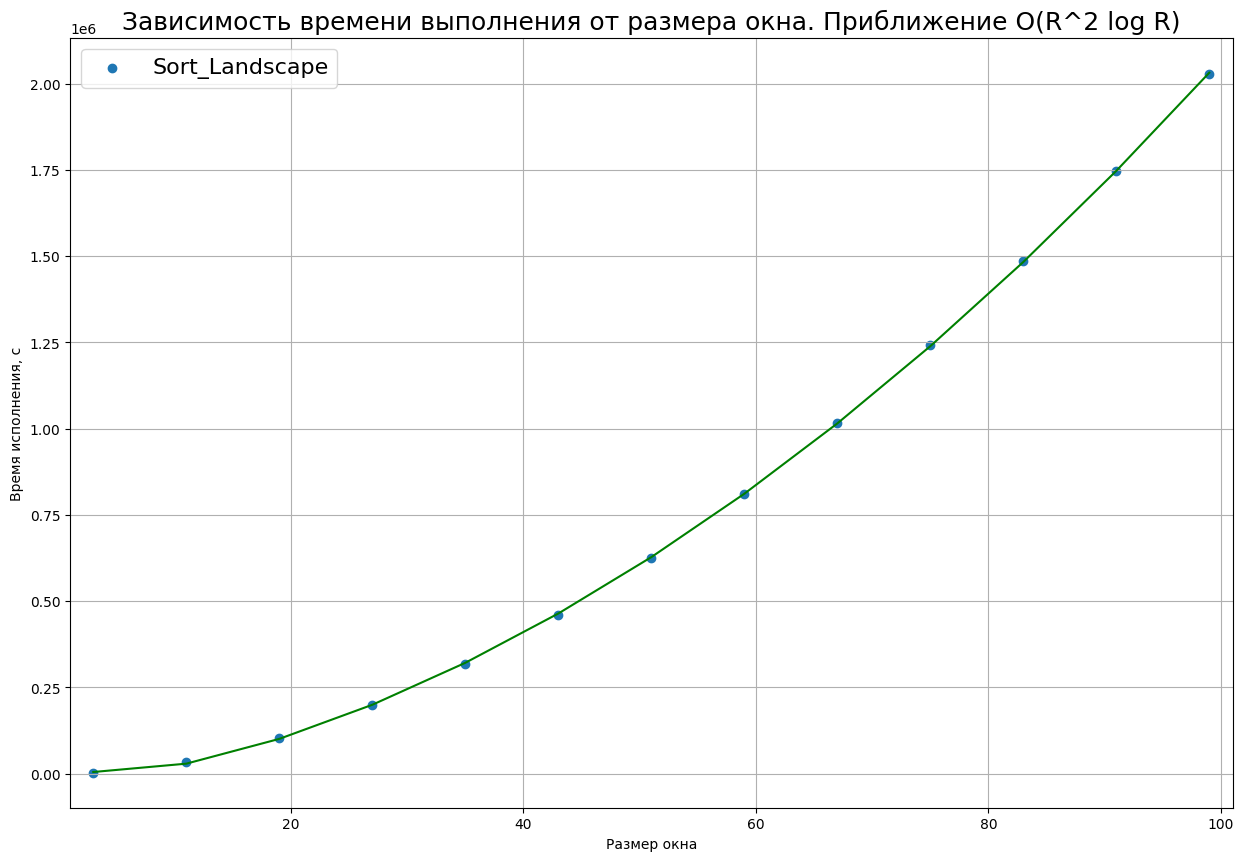

In [169]:
MakeApprox(names_land[0], "Sort_land_approx_3", light_pic, func3, "Зависимость времени выполнения от размера окна. Приближение O(R^2 log R)")

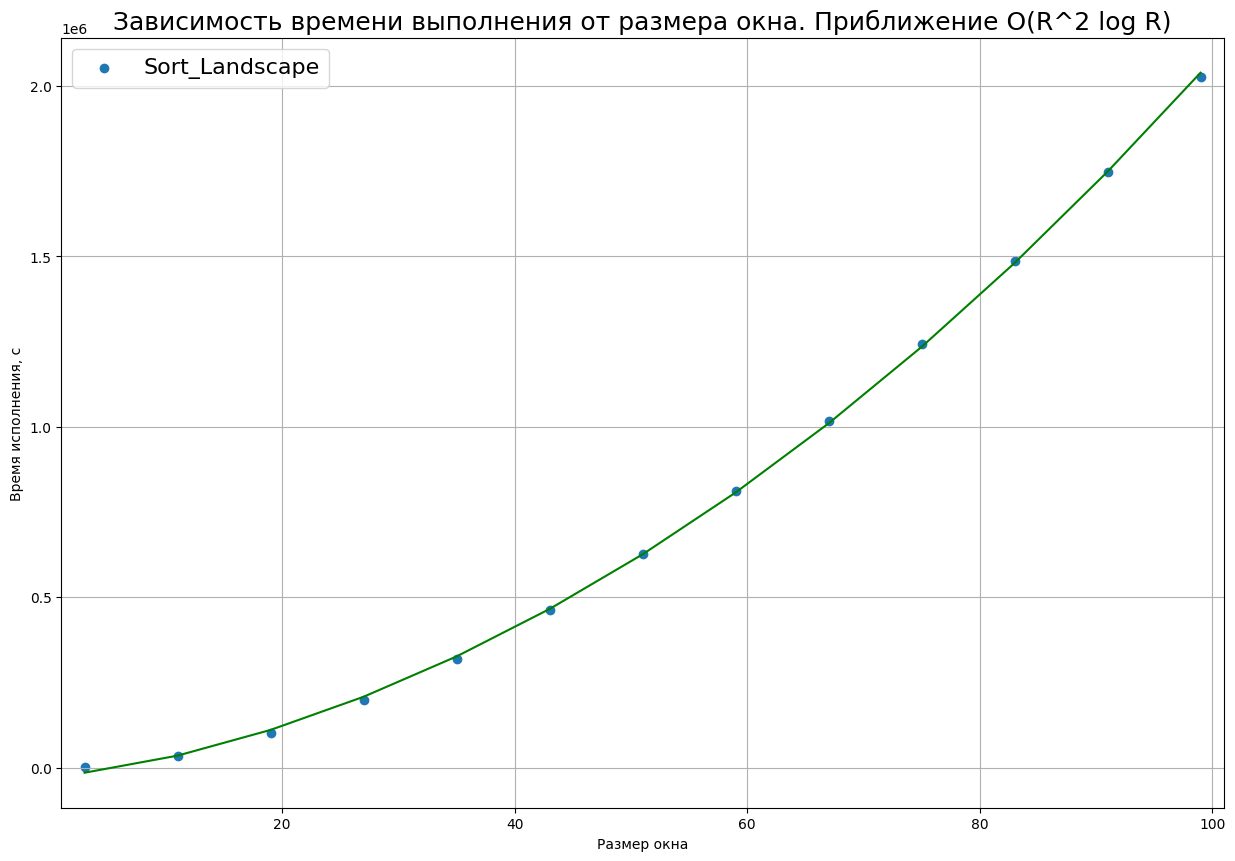

In [170]:
MakeApprox(names_land[0], "Sort_land_approx_4", light_pic, func4, "Зависимость времени выполнения от размера окна. Приближение O(R^2 log R)")

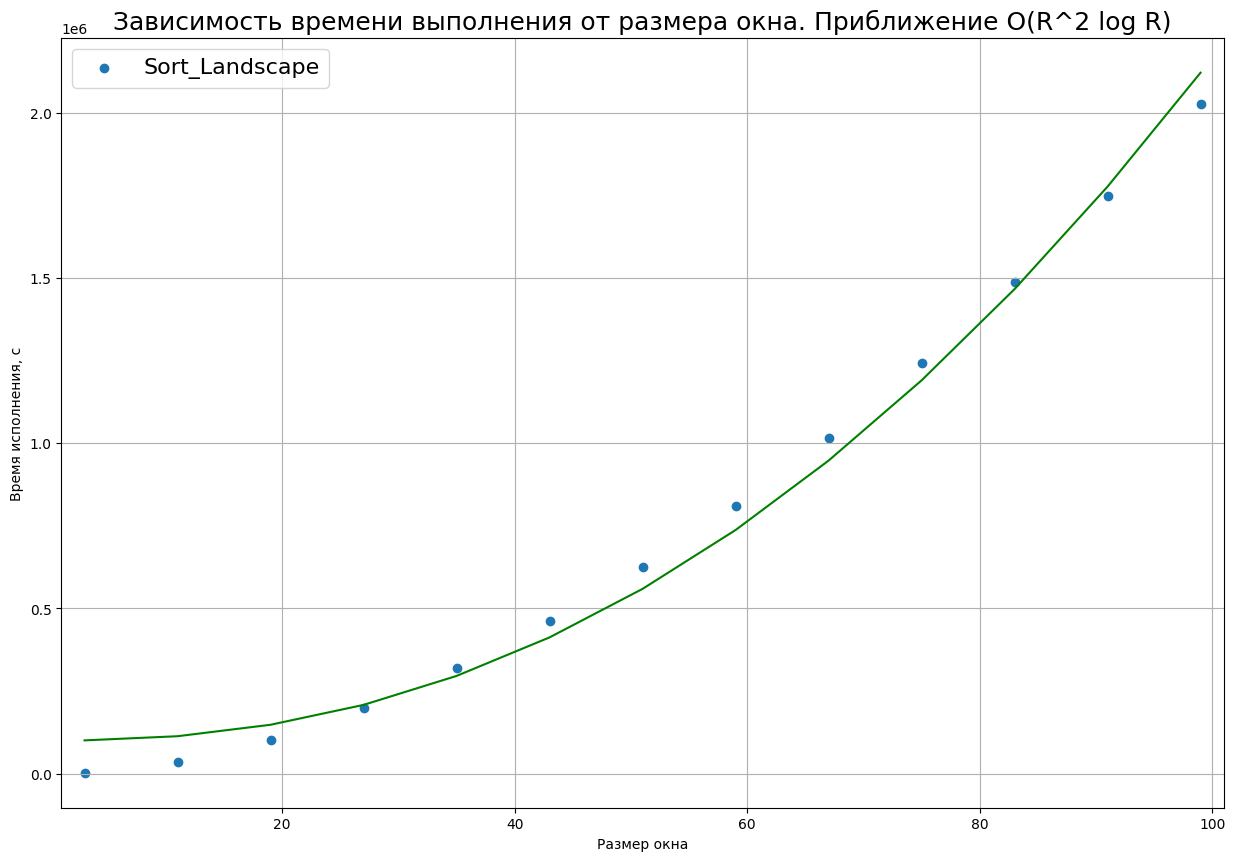

In [171]:
MakeApprox(names_land[0], "Sort_land_approx_5", light_pic, func5, "Зависимость времени выполнения от размера окна. Приближение O(R^2 log R)")